# Stock Market Analysis
In this data analysis project, we will look at data from the stock market, particularly some technology stocks. We will be using some stock information in .csv format. We will learn how to visualize different aspects of the stocks, and finally we will look at a few ways of analysing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!!

We will be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Information
In this section we will go over how to set our stock data, and how to analyse basic attributes of a stock. 

In [1]:
#some standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# import vizualization modules and libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# to make plots appear in the ipython-notebook
%matplotlib inline

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# grab stocks data to use in csv forms

#Apple stocks
AAPL = pd.read_csv('apple_stock.csv')

#Google stocks
GOOG = pd.read_csv('google_stock.csv')

#Microsoft stocks
MSFT = pd.read_csv('microsoft_stock.csv')

#Amazon stocks
AMZN = pd.read_csv('amazon_stock.csv')

In [3]:
# preview the data
# let's preview apple data
AAPL

,Date,High,Low,Open,Close,Volume,Adj Close
0,06/08/2019,198.070007,194.039993,196.309998,197.000000,35824800,194.676621
1,07/08/2019,199.559998,193.820007,195.410004,199.039993,33364400,196.692566
2,08/08/2019,203.529999,199.389999,200.199997,203.429993,27009500,201.030792
3,09/08/2019,202.759995,199.289993,201.300003,200.990005,24619700,199.374222
4,12/08/2019,202.050003,199.149994,199.619995,200.479996,22474900,198.868317
...,...,...,...,...,...,...,...
248,30/07/2020,385.190002,375.070007,376.750000,384.760010,39532500,384.760010
249,31/07/2020,425.660004,403.299988,411.540008,425.040008,93584200,425.040008
250,03/08/2020,446.549988,431.570007,432.799988,435.750000,77037800,435.750000
251,04/08/2020,443.160004,433.549988,436.529999,438.660004,43267900,438.660004


Now we have different stock information for some tech companies i.e APPLE,GOOGLE,MICROSOFT and AMAZON.

We can start by playing around with Apple stock data and do some analysis on it.

In [4]:
# get general information on the structure of apple dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Open       253 non-null    float64
 4   Close      253 non-null    float64
 5   Volume     253 non-null    int64  
 6   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


#### N/B:
Below is a description of what each column represent.

    'High column' - the highest stock price for the day
    'Low' column - the lowest stock price for the day
    'Open' column - the opening stock price for the day
    'Close' column - the closing stock price for the day
    'Volume' column - the volume for the stock prices traded that day
    'Adj Close' column - takes into account any stock changes e.g if there is a split stock etc. So, it will adjust the closing price accordingly.
Adjusted Closing price is mostly useful in historical data analysis.

In [5]:
# get summary statistics for Apple dataframe
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,288.480791,281.667352,284.651344,285.464110,3.566312e+07,284.442895
std,54.364999,53.060219,53.613803,53.843817,1.717176e+07,54.379475
min,198.070007,193.820007,195.410004,197.000000,1.165440e+07,194.676621
25%,248.720001,239.619995,244.509994,243.580002,2.441360e+07,241.621826
50%,283.010010,277.720001,279.799988,280.019989,3.113050e+07,278.602814
75%,321.149994,316.000000,318.579987,318.850006,4.135720e+07,318.109985
max,446.549988,435.589996,437.510010,440.250000,1.067212e+08,440.250000


### Some basic analysis.
##### Qn 1.) What was the change in price of the stock over time?
Let's do a historical view of the closing price. To achieve this,we can vizualize the 'Adj Close' column.

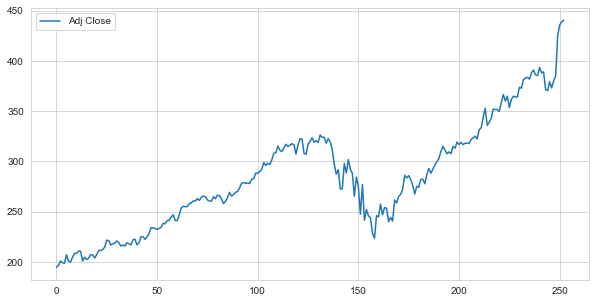

In [6]:
# historical view of the closing price over time
AAPL['Adj Close'].plot(x = AAPL['Date'],legend=True,figsize = (10,5))

##### Qn 2.) What was the daily return of the stock on average?

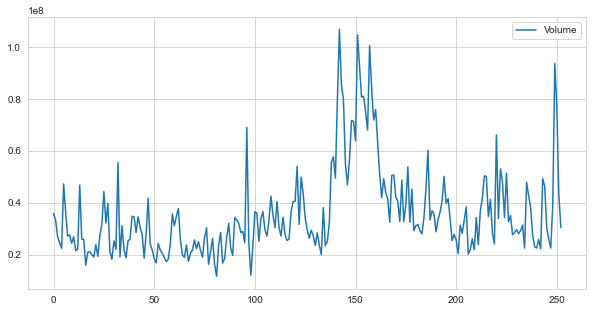

In [7]:
# let's now view the volume of stock traded each day over time
AAPL['Volume'].plot(legend=True,figsize=(10,5))

Right now the X - axis is indicating values instead of dates. For a good inspection of the volume of stocks sold over time, it would be awesome setting the X - axis to show dates. To achieve that, we will set the 'Date' column in our dataframe as the index for the dataframe. Actually, we would set all dataframes for all stock data we are analysing here, to have the dataframe index as the dates.

In [8]:
# set all stocks to have 'Date' column as index 
AAPL.set_index('Date',inplace=True)
GOOG.set_index('Date',inplace=True)
MSFT.set_index('Date',inplace=True)
AMZN.set_index('Date',inplace=True)

# let's preview AAPL and look at the changes
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
06/08/2019,198.070007,194.039993,196.309998,197.000000,35824800,194.676621
07/08/2019,199.559998,193.820007,195.410004,199.039993,33364400,196.692566
08/08/2019,203.529999,199.389999,200.199997,203.429993,27009500,201.030792
09/08/2019,202.759995,199.289993,201.300003,200.990005,24619700,199.374222
12/08/2019,202.050003,199.149994,199.619995,200.479996,22474900,198.868317


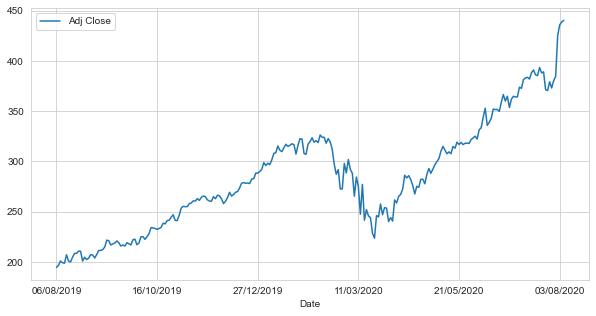

In [9]:
# plot AAPL historical view of the closing prices again
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

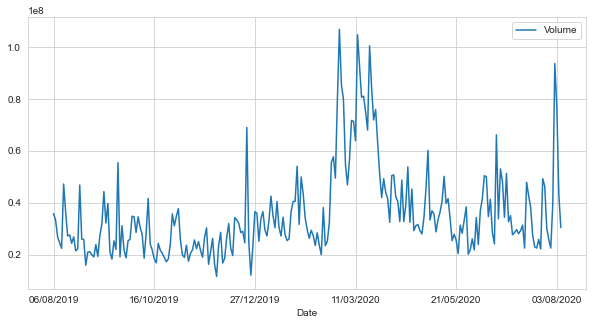

In [10]:
# let's now view the volume of stock traded each day over time
AAPL['Volume'].plot(legend=True,figsize=(10,5))

Great!!! Now we can tell easily  and clearly the different times that the volumes of stocks either rose up or fell down.

##### Qn 3.) What was the moving average of the various stocks?
Having looked at the historical view of the closing price and the volume traded over time,we can now move forward and calculate the moving average for the stocks.



For more info on the moving average check out the links below:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Let's do moving averages for Apple stock.

In [13]:
# moving averages for AAPL stock
# define the number of days for the moving average
ma_day = [10,20,50]

# make a for loop for calculating moving averages for the specified number of days
for ma in ma_day:
    # create a column name for specific number of days
    column_name = 'MA for %s days'%(str(ma))
    
    # create a column in the AAPL dataframe for the moving averages of the defined days
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [16]:
# check the first five rows of the AAPL dataframe with the newly added moving averages columns
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
06/08/2019,198.070007,194.039993,196.309998,197.000000,35824800,194.676621,NaN,NaN,NaN
07/08/2019,199.559998,193.820007,195.410004,199.039993,33364400,196.692566,NaN,NaN,NaN
08/08/2019,203.529999,199.389999,200.199997,203.429993,27009500,201.030792,NaN,NaN,NaN
09/08/2019,202.759995,199.289993,201.300003,200.990005,24619700,199.374222,NaN,NaN,NaN
12/08/2019,202.050003,199.149994,199.619995,200.479996,22474900,198.868317,NaN,NaN,NaN


In [17]:
# check the last five rows of the AAPL dataframe
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
30/07/2020,385.190002,375.070007,376.750000,384.760010,39532500,384.760010,381.484000,381.034000,356.370599
31/07/2020,425.660004,403.299988,411.540008,425.040008,93584200,425.040008,385.457001,384.080501,358.486799
03/08/2020,446.549988,431.570007,432.799988,435.750000,77037800,435.750000,389.689001,387.175500,360.864799
04/08/2020,443.160004,433.549988,436.529999,438.660004,43267900,438.660004,394.755002,390.474001,363.260198
05/08/2020,441.570007,435.589996,437.510010,440.250000,30444200,440.250000,399.871002,393.418001,365.730598


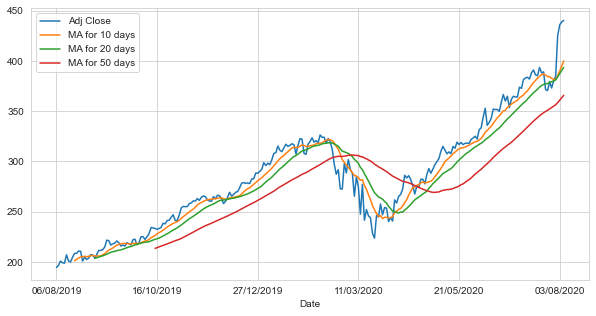

In [21]:
# let's now plot the moving averages 
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,5))

Great! Something to notice about moving averages is that as you do moving averages for more days at a time, you tend to get a smoother line.

### Daily Returns and risk of the stock

To analyze the daily returns and risk of the stock, we will look into the daily change in the returns and not just the absolute value of the returns.

In [23]:
# daily returns for AAPL stock
# create a 'Daily Return' column using percentage change in the Closing price
AAPL['Daily_Return'] = AAPL['Adj Close'].pct_change()

In [24]:
# inspect apple dataframe with the new column
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily_Return
Date,,,,,,,,,,
06/08/2019,198.070007,194.039993,196.309998,197.000000,35824800,194.676621,NaN,NaN,NaN,NaN
07/08/2019,199.559998,193.820007,195.410004,199.039993,33364400,196.692566,NaN,NaN,NaN,0.010355
08/08/2019,203.529999,199.389999,200.199997,203.429993,27009500,201.030792,NaN,NaN,NaN,0.022056
09/08/2019,202.759995,199.289993,201.300003,200.990005,24619700,199.374222,NaN,NaN,NaN,-0.008240
12/08/2019,202.050003,199.149994,199.619995,200.479996,22474900,198.868317,NaN,NaN,NaN,-0.002537


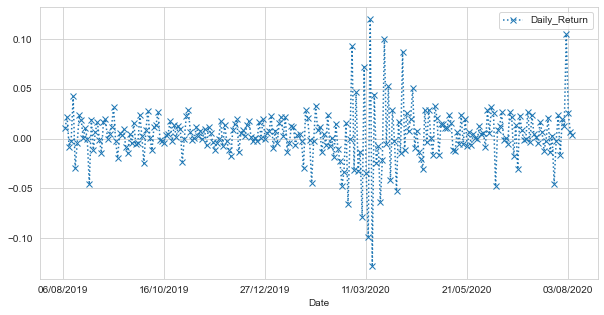

In [25]:
# plot AAPL 'Daily_Return' column
AAPL['Daily_Return'].plot(figsize=(10,5),linestyle='dotted',marker='x',legend='True')

We can also have a look at the average daily return for the stock using a histogram.

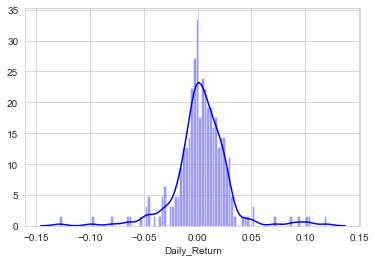

In [26]:
# make a kde plot and histogram for the daily returns
sns.distplot(AAPL['Daily_Return'].dropna(),bins=100,color='blue')

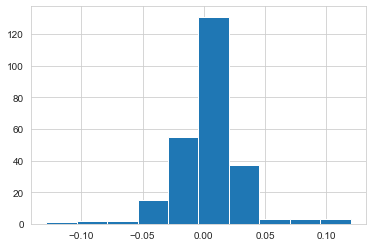

In [27]:
#histogram of the daily returns
AAPL['Daily_Return'].hist()

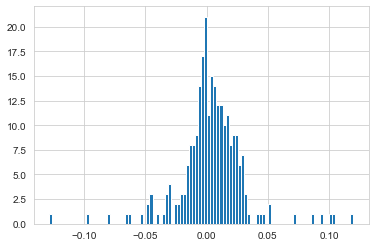

In [28]:
AAPL['Daily_Return'].hist(bins=100)

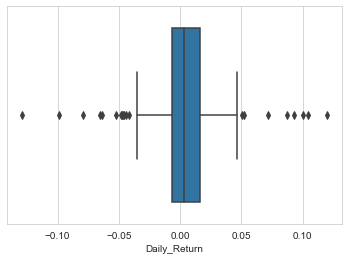

In [29]:
sns.boxplot(x='Daily_Return',data=AAPL)

In [30]:
tech_list = [AAPL,GOOG,MSFT,AMZN]

#### Closing Prices for all the stocks

To analyze and compare the closing prices for all the stocks,we need a dataframe of all the closing prices for the stocks.

For this case, I created an Excel file containing the data for all the closing prices,using the 'Adj Close' column of each stock.

In [31]:
# I will grab my closing prices xlsx file
closing_prices = pd.ExcelFile("C:\\Users\\BEN KOLE\\Desktop\\EXCEL\\Udemy_Example_projects\\closing_prices_data.xlsx")

In [32]:
# create a dataframe from the excel_sheet containing the closing prices data 
closing_df = closing_prices.parse('closing_prices_data',index_col='Date')

In [33]:
# preview the dataframe
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-06,194.676621,1787.829956,1169.949951,133.052750
2019-08-07,196.692566,1793.400024,1173.989990,133.635544
2019-08-08,201.030792,1832.890015,1204.800049,137.201691
2019-08-09,199.374222,1807.579956,1188.010010,136.036041
2019-08-12,198.868317,1784.920044,1174.709961,134.139358


In [34]:
# create a dataframe for the tech returns
tech_returns = closing_df.pct_change()

In [35]:
# preview the tech returns dataframe showing daily percentage change in returns
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-06,NaN,NaN,NaN,NaN
2019-08-07,0.010355,0.003116,0.003453,0.004380
2019-08-08,0.022056,0.022020,0.026244,0.026686
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943


##### Qn 4.) What was the correlation between different stocks' daily returns?

Having created a dataframe on all the closing prices for all the stocks and another one for the percentage change in returns,we can now compare these returns and investigate how they correlate to each other.

We can start by comparing Google's returns to itself.

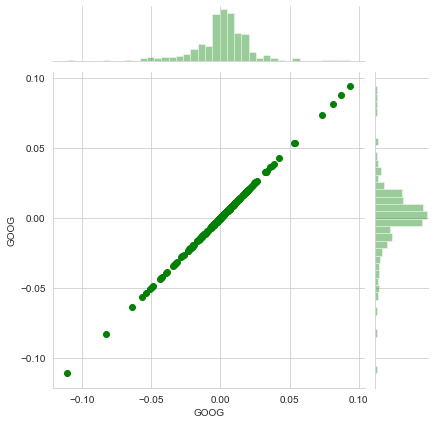

In [36]:
# compare GOOG to itself
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='green')

As seen in the above plot, GOOG versus GOOG stocks have a perfect linear positive relationship because we are comparing to itself.

How about if we compare different stocks,how will the relationship look like? Will there be a relationship in the first place?

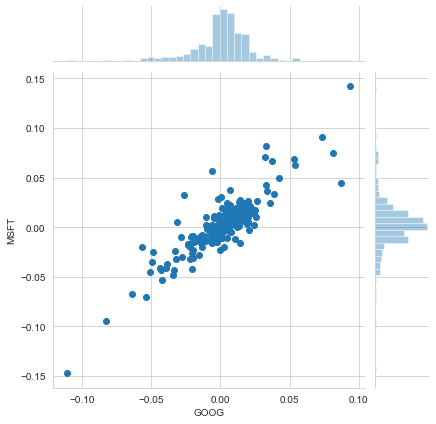

In [37]:
# compare Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

From the above plot,by looking at the scatter diagram, it looks like Google and Microsoft daily percentage returns have a positive linear relationship. Using Pandas, we can get different correlation coefficients to determine the strength of the relationships.

In [38]:
# get pearsons correlation coeffient
tech_returns[['GOOG','MSFT']].corr(method='pearson')

,GOOG,MSFT
GOOG,1.000000,0.871376
MSFT,0.871376,1.000000


From our data,Microsoft and Google daily percentage returns have a pearson correlation coefficient of about 0.8714.

With a correlation coefficient of 0.8714, that means Google and Microsoft daily percentage returns have a strong positive linear relationship.

In [39]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-06,194.676621,1787.829956,1169.949951,133.052750
2019-08-07,196.692566,1793.400024,1173.989990,133.635544
2019-08-08,201.030792,1832.890015,1204.800049,137.201691
2019-08-09,199.374222,1807.579956,1188.010010,136.036041
2019-08-12,198.868317,1784.920044,1174.709961,134.139358


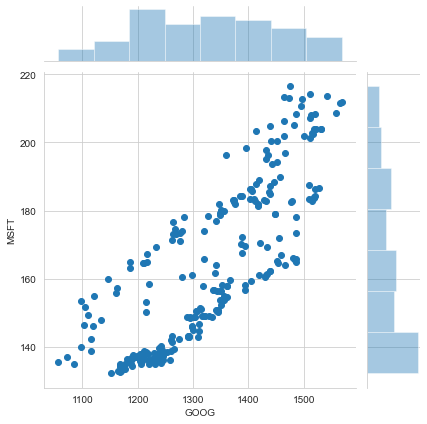

In [40]:
sns.jointplot('GOOG','MSFT',closing_df,kind='scatter')

We get the same insights of the linear relationship between google returns and microsoft returns in the above plot. And as seen,there is a positive linear relationship between google and microsoft daily returns. Again, we can check the correlation coefficient to confirm the strength of the relationship.

In [41]:
closing_df[['GOOG','MSFT']].corr(method='pearson')

,GOOG,MSFT
GOOG,1.000000,0.819313
MSFT,0.819313,1.000000


With a pearsons correlation coefficient of 0.8193 (which is close to 1,the perfect strong positive linear relationship), we conclude that Google daily returns have a strong positive linear relationship.

###### N/B:
Google and Google have a perfect strong linear relationship with a pearsons correlation coefficient of 1,same case as Microsoft versus Microsoft stocks. This is because it's a comparison to themselves. So if you compare Microsoft to itself,definitely you will get a pearson correlation coefficient of 1(a perfect strong linear relationship).

#### comparison analysis with Seaborn and Pandas
With the power of Seaborn and Pandas modules, it's quite easy to repeat this comparison analysis for every possible combination of stocks in our technology stock list. We can use sns.pairplot() to automatically create this plot

In [42]:
# preview our percentage change in returns dataframe
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-06,NaN,NaN,NaN,NaN
2019-08-07,0.010355,0.003116,0.003453,0.004380
2019-08-08,0.022056,0.022020,0.026244,0.026686
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943


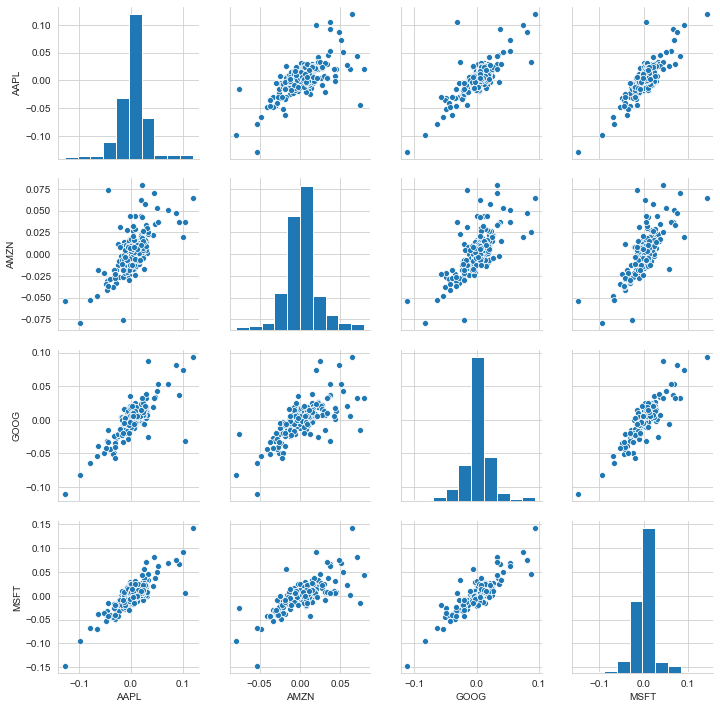

In [43]:
# create a comparison analysis plot using sns.pairplot()
sns.pairplot(tech_returns.dropna())

As seen in the above plot, sns.pairplot() gives us a quick view of the relationship between different stocks. Along the diagonal of the figure, is the histogram for each stock data. By quick glance, it looks like several stocks in our dataframe are perfectly correlated to each other. For example. it looks like there's some super correlation between Microsoft and Apple, Google and Apple, Google and Microsoft. And it might be interesting investigating these individual relationships and comparisons.

Apart from sns.pairplot(), we can use sns.PairGrid for a full control of the figure, for example what goes along the diagonal, in the upper triangle, lower triangle etc etc.

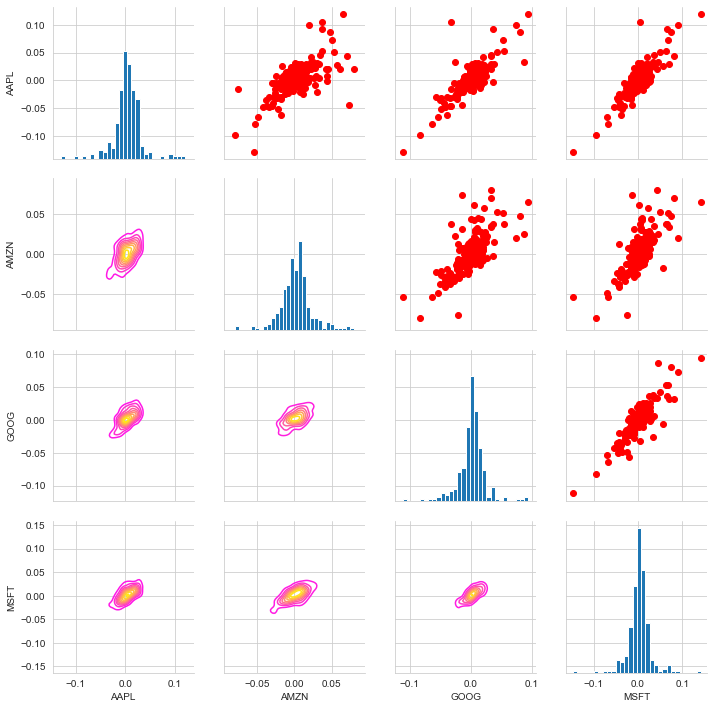

In [44]:
# using sns.PairGrid()
# set up the figure by calling sns.PairGrid() on it
returns_fig = sns.PairGrid(tech_returns.dropna())

# decide what to go in the upper triangle, I will let it to be a scatter plot
returns_fig.map_upper(plt.scatter,color='red')

# decide what to go in the lower triangle, for this case let it be a kde plot
returns_fig.map_lower(sns.kdeplot,cmap='spring')

# decide what to go along the diagonal, I will do a histogram here
returns_fig.map_diag(plt.hist,bins=30)

To see the numerical values between the correlations, we can use pandas corr method to display a table or kind of a dataframe of the correlation values.

In [45]:
# compare correlation values for stocks' daily returns
tech_returns.dropna().corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.663988,0.807556,0.862757
AMZN,0.663988,1.000000,0.690585,0.720431
GOOG,0.807556,0.690585,1.000000,0.871376
MSFT,0.862757,0.720431,0.871376,1.000000


Remember, these values are called pearson correlation coeficients. A pearson correlation coefficient shows the strength and direction of the linear relationship. The correlation coefficient is between -1 and 1. A coefficient close to 1 indicates a very strong(strength) positive(direction) linear relationship, whereas a coefficient close to -1 indicates a very strong negative linear relationship. A coefficient of 0 means no linear relationship (It does not mean there is no relationship at all,it only means there is NO LINEAR RELATIONSHIP).

From the correlation dataframe, Google and Microsoft have the highest correlation coefficient value of around 0.87, which indicates a very strong positive linear relationship, as we had seen earlier from the plots. 

##### Qn 4.) What was the correlation between different stocks' closing prices?
Having analyzed the correlations between the stocks' daily returns, we can still apply the above same techniques in analyzing the correlations between the stocks' closing prices. Let's dive into that below.

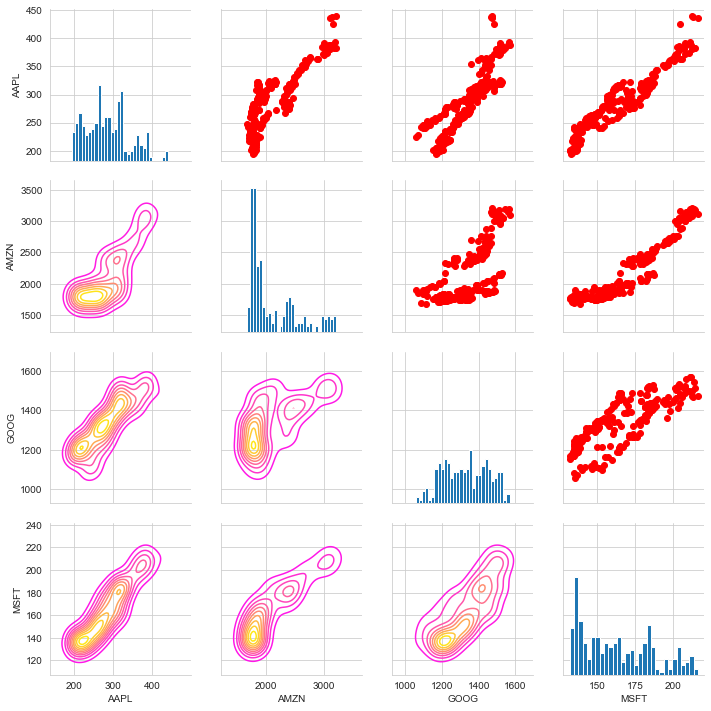

In [46]:
# compare relationships between closing prices
# set up the figure by calling sns.PairGrid() on it, but this time use closing prices dataframe
returns_fig = sns.PairGrid(closing_df.dropna())

# decide what to go in the upper triangle, I will let it to be a scatter plot
returns_fig.map_upper(plt.scatter,color='red')

# decide what to go in the lower triangle, for this case let it be a kde plot
returns_fig.map_lower(sns.kdeplot,cmap='spring')

# decide what to go along the diagonal, I will do a histogram here
returns_fig.map_diag(plt.hist,bins=30)

By looking at the above plot, we can easily see that there is some perfect correlation between Microsoft and Apple, and also between Google and Apple(have a look at their kde plots and scatter diagrams).

We can now look into their numerical correlation values.

In [47]:
# compare correlation values for stocks' closing prices
closing_df.dropna().corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.856026,0.877131,0.955395
AMZN,0.856026,1.000000,0.656029,0.927349
GOOG,0.877131,0.656029,1.000000,0.819313
MSFT,0.955395,0.927349,0.819313,1.000000


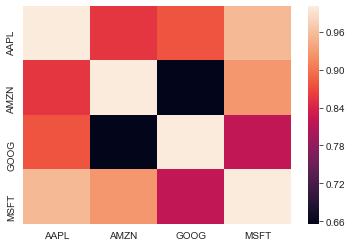

In [48]:
# we can also do a heatmap of the correlations
sns.heatmap(closing_df.dropna().corr())

From the table, Microsoft and Apple have the highest correlation coefficient of about 0.96, which indicates a super strong positive linear relationship, just the same intuition we got through the visualizations, using sns.PairGrid(). It's the same intuition we get from the heatmap of the correlations. That's NICE!!!

An INTERESTING insight that we get from these correlation comparisons analysis of daily returns and closing prices is that, all technology stocks are positively correlated.

### Risk of a Stock
##### Qn 6.) How much value do we put at risk by investing in a particular stock?

With the information we have on daily percentage returns, we can analyze risk of a stock by comparing the expected returns with the standard deviation of the daily returns. This is just one of the basic ways of analyzing risk of a stock out of the many ways used to quantify risk. Some are advanced but here we are using a basic way of risk analysis.

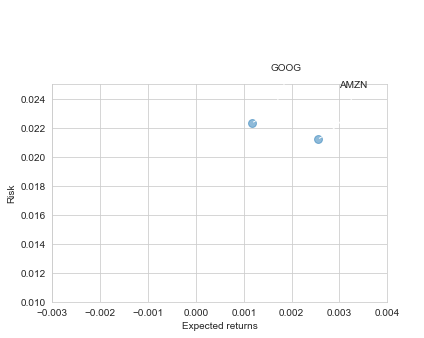

In [49]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_returns DataFrame
returns = tech_returns.dropna()

# define the area for the scatter plot we are going to make
area = np.pi*20

# make a scatter plot
plt.scatter(x = returns.mean(), y = returns.std(), s = area, alpha=0.5)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

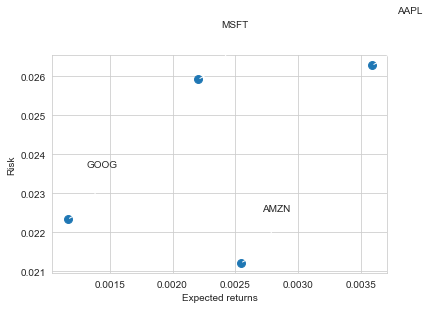

In [50]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_returns DataFrame
returns = tech_returns.dropna()

# define the area
area = np.pi*20

# make a scatter plot
plt.scatter(x = returns.mean(), y = returns.std(), s = area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
    s = label,
    xy = (x, y),
    xytext = (50,50),
    textcoords = 'offset points',
    ha = 'right',
    va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = -0.3'))

A good stock gives a stronger Expected return and a lower risk. You would not prefer a negative return (this means a loss) in your stock or business. Again, an investment or business with a higher return (mean) and a higher risk (standard deviation) is troublesome. Looking at the overall picture of the scatter plot above, Amazon seems to be the best stock because it has a very high return with a very low risk.

#### Value at Risk
##### Qn 6.) How much value do we put at risk by investing in a particular stock?
Le's now move forward and define a value at risk parameter for our stocks. In simple terms, we take or define the value at risk to be the amount of money we expect to lose (i.e putting at risk) for a given confidence interval. There are many methods used to estimate value at risk but here we are going to look at two methods:

a) Bootstrap method

b) Monte carlo technique

#### Value at risk using the 'bootstrap' method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

In [51]:
# view AAPL dataframe
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily_Return
Date,,,,,,,,,,
06/08/2019,198.070007,194.039993,196.309998,197.000000,35824800,194.676621,NaN,NaN,NaN,NaN
07/08/2019,199.559998,193.820007,195.410004,199.039993,33364400,196.692566,NaN,NaN,NaN,0.010355
08/08/2019,203.529999,199.389999,200.199997,203.429993,27009500,201.030792,NaN,NaN,NaN,0.022056
09/08/2019,202.759995,199.289993,201.300003,200.990005,24619700,199.374222,NaN,NaN,NaN,-0.008240
12/08/2019,202.050003,199.149994,199.619995,200.479996,22474900,198.868317,NaN,NaN,NaN,-0.002537


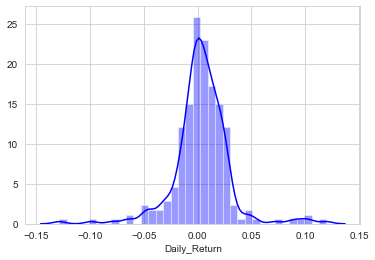

In [52]:
# Make a histogram for Apple daily returns
# For this case we will use sns.displot() to make a histogram and a kdeplot
# remember to remove any null values
sns.distplot(AAPL['Daily_Return'].dropna(),color='blue')

We can now use quantiles to get the risk of the stocks.

In [53]:
# let's preview our daily returns dataframe that we made
returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-07,0.010355,0.003116,0.003453,0.004380
2019-08-08,0.022056,0.022020,0.026244,0.026686
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943
2019-08-13,0.042348,0.022085,0.019205,0.020694


Let's use pandas built-in 'quantile' method to get the quantiles for Apple daily returns. 

In [54]:
# The 0.05 empirical quantile of daily returns
returns['AAPL'].quantile(0.05)

-0.034258382660586284

The 0.05 empirical quantile of daily returns is at -0.034. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

We can actually do the same for the other stocks in out portfolio, but meanwhile we'll look at value at risk by implementing a Monte Carlo method.


#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:
    
    ΔS/S=μΔt+σϵ√Δt

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.
    
    ΔS=S(μΔt+σϵ√Δt)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [55]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = returns['GOOG'].mean()

# Now let's grab the volatility of the stock from the std() of the average return
sigma = returns.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated from our daily returns.

In [56]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    
    price[0] = start_price
    
    # define the shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate the shock at that time of x
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Great! Now we have our function. Let's put it to work.

In [57]:
# preview Google stock dataframe, GOOG
# check the price at the beginning
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
06/08/2019,1179.959961,1160.000000,1163.310059,1169.949951,1709400,1169.949951
07/08/2019,1178.444946,1149.624023,1156.000000,1173.989990,1444300,1173.989990
08/08/2019,1205.010010,1173.020020,1182.829956,1204.800049,1468000,1204.800049
09/08/2019,1203.880005,1183.603027,1197.989990,1188.010010,1065700,1188.010010
12/08/2019,1184.959961,1167.671997,1179.209961,1174.709961,1003000,1174.709961


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

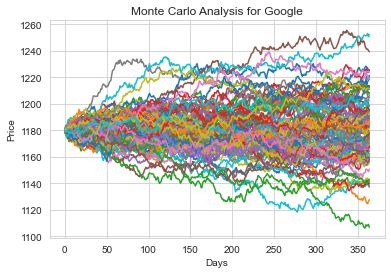

In [58]:
# Get start price from GOOG.head()
start_price = 1179.959961

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

# label the x-axis
plt.xlabel("Days")

#label the y-axis
plt.ylabel("Price") 

# give a title for the plot
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [59]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use quantile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

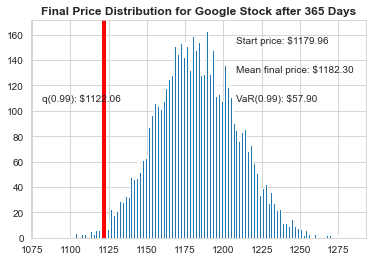

In [60]:
# Now we'll define q as the 1% empirical quantile
# this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final Price Distribution for Google Stock after %s Days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $58.44 for every investment of 1179.96 (the price of one inital google stock).

This basically menas for every initial stock you purchase you are putting about $58.44 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.

## Great job!